# Relation Extraction

### Grundidee

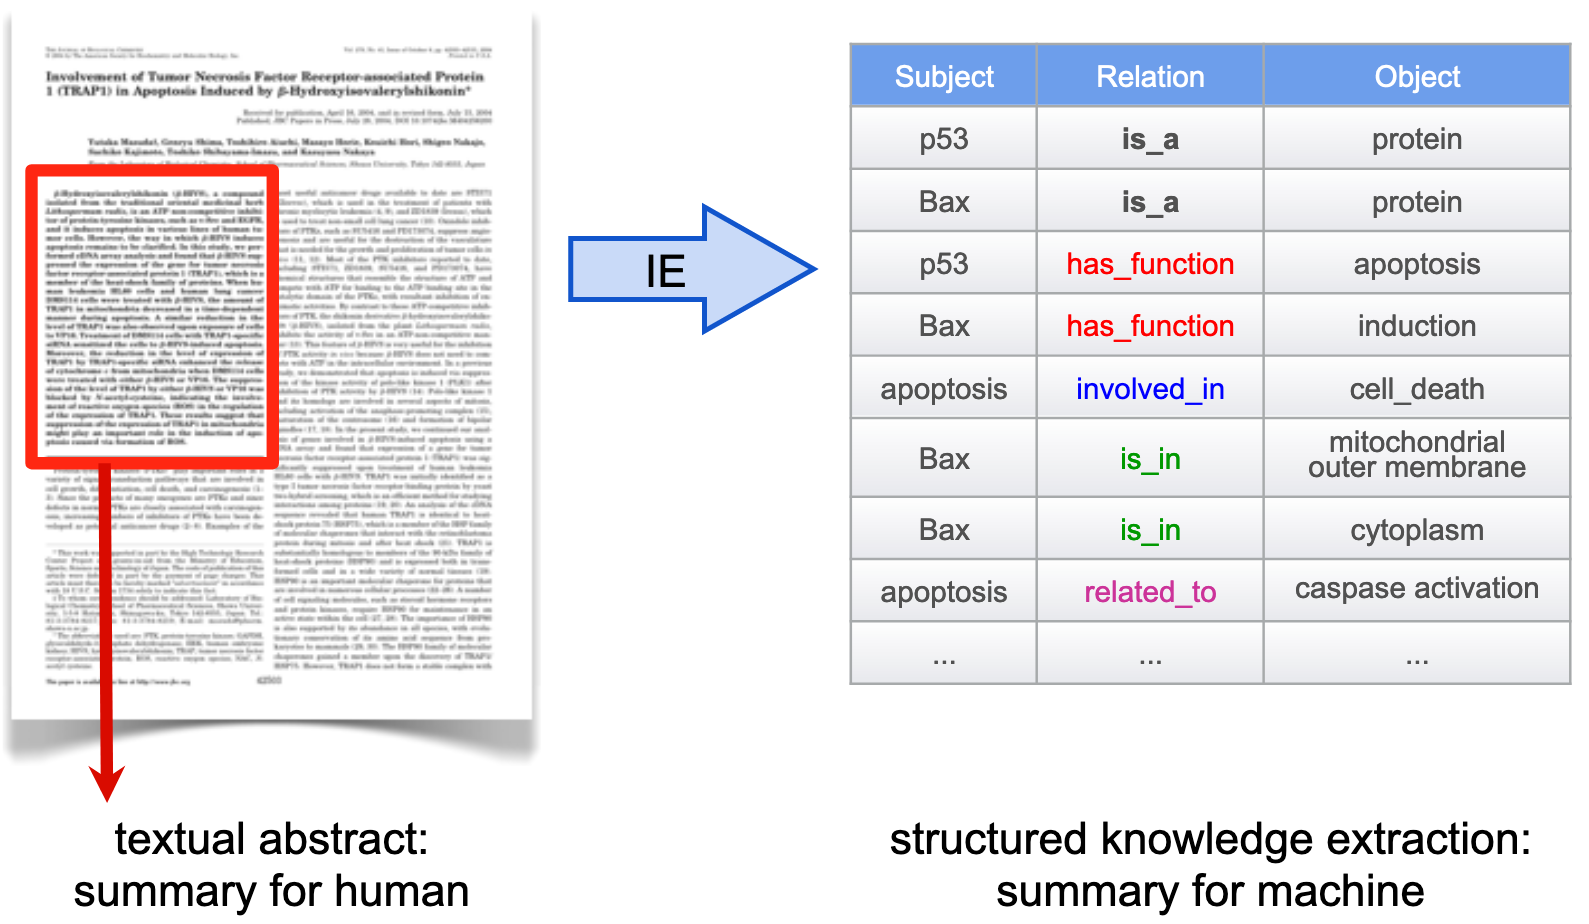

[Source](https://courses.cs.washington.edu/courses/cse517/13wi/slides/cse517wi13-RelationExtraction.pdf)

aufbauend auf den Entitäten, die man mit NER erkannt hat, versucht man nun Verlinkungen zwischen diesen zu extrahieren

NER => Barack Obama, Michelle Obama

Relation Extraction => Barack Obama ist mit Michelle Obama verheiratet

### Relation Types

- ROLE: stellt Beziehung zwischen Person und Organisation oder geopolitischer Entität dar: Mitglied, Besitzer, Bürger, Kunde

- PART: verallgemeinert verschiedene Untertypen: subsidiär, physischer Teil, Mitglieder einer Menge

- AT: bezeichnet feste und vorübergende geographische Untertypen: befindet sich in, ansässig in, wohnhaft

- SOCIAL: vertritt soziale Beziehungen zwischen Untertypen von Personen: Eltern, Geschwister, Ehemann/frau, Großeltern, Kollege

### Beispiel

CHICAGO (AP) — Citing high fuel prices, United Airlines said Friday it has increased fares by $6 per round trip on flights to some cities also served by lower-cost carriers. American Airlines, a unit of AMR, immediately matched the move, spokesman Tim Wagner said. United, a unit of UAL, said the increase took effect Thursday night and applies to most routes where it competes against discount carriers, such as Chicago to Dallas and Atlanta and Denver to San Francisco, Los Angeles and New York.

### Antwort

CHICAGO (AP) — Citing high fuel prices, United Airlines said Friday it has increased fares by $6 per round trip on flights to some cities also served by lower-cost carriers. <span style="color:red"> American Airlines </span>, a <span style="color:green">unit of </span> <span style="color:blue">AMR</span>, immediately matched the move, <span style="color:green">spokesman </span> <span style="color:red"> Tim Wagner </span> said. <span style="color:red">United</span>, a <span style="color:green">unit of  </span> <span style="color:blue"> UAL </span>, said the increase took effect Thursday night and applies to most routes where it competes against discount carriers, such as Chicago to Dallas and Atlanta and Denver to San Francisco, Los Angeles and New York.

| Subject        | Relation           | Object  |
| :-------------: |:-------------:| :-----:|
| <span style="color:red"> American Airlines </span>      | <span style="color:green">subsidiary</span> | <span style="color:blue">AMR</span> |
| <span style="color:red"> Tim Wagner </span>      | <span style="color:green">employee </span>     |   <span style="color:blue"> American Airlines </span> |
| <span style="color:red">United</span> |   <span style="color:green">subsidiary</span> | <span style="color:blue"> UAL </span>


### Methoden für Relation Extraction

1) Händische Schema

2) Bootstrapping Methoden:
- man hat ein paar schon definierte Relationstupel und die Relation
- sammelt Sätze, die diese Relation abbilden
- extrapoliert von diesen Sätzen weiter

3) Supervised methods:
- Annotierte Textdaten, d.h. Sätzen inkl. extrahierten Relationen
- Trainings eines Modells auf Basis dieser Daten

4) Unsupervised methods

In [ ]:
# handwritten rules to extract relations from text
from nltk import tokenize
from collections import defaultdict

In [ ]:
# tokenize and tag the sentences with pos_tags
def ie_preprocess(document):
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences

In [ ]:
def extract_named_entities(text):
    extracted_NEs = defaultdict(list)
    for sentence in tagged_text:
        for chunk in nltk.ne_chunk(sentence):
            if hasattr(chunk, 'label'):
                key = ' '.join(c[0] for c in chunk)
                value = chunk.label()
                extracted_NEs[key] = value
    return extracted_NEs

In [ ]:
text = "Welcome to the wonderful town of Munich. Munich is the capital of Bavaria. Bavaria is part of Germany. The Bayerische Motoren Werke (BMW) was founded in Munich. The Oktoberfest takes place in Munich every year in October."

# tokenize and pos_tag the text
tagged_text = ie_preprocess(text)

# extract named entities from tagged text
extracted_nes = extract_named_entities(tagged_text)


In [ ]:
# extract the phrases containing named entities
# e.g. Munich is capital of Bavaria
# consider extracted named entities 
# as well as the POS-tags of the words between the NEs
# result should like: [GPE:Munich] is capital of [GPE:Bavaria]
def extract_phrases(ne_sentences, relations, nes):
    relations_extracted = []
    for sentence in ne_sentences:
        phrase = ""
        start_found = False
        end_found = False
        for word in sentence:
            if word[0] in nes.keys():
                if not start_found: 
                    start_found = True
                else:
                    end_found = True
                phrase += "[" + nes[word[0]] + ":" + word[0] + "]" + " "
            elif word[1] in ["VBN", "VBZ", "NN", "NNP"]:
                if start_found and not end_found:
                    phrase += word[0] + " "
            elif word[1] == "IN":
                if start_found and not end_found:
                    phrase += word[0] + " "
        if start_found and end_found:
            relations_extracted.append(phrase)
    return relations_extracted
                

ex_phrases = extract_phrases(tagged_text, relations, extracted_nes)

In [ ]:
# replace the relation in the extracted phrases by its pattern and print the result
# consider a regex expression
patterns = {'PART': ['is capital of', 'is part of'], 'IN': ['founded in', 'takes place in']}

import re
for phrase in ex_phrases:
    for pattern_name, examples in patterns.items():
        w = re.match('(\[.*\])(.+)(\[.*\])', phrase)
        if w.group(2).strip() in examples:
             print(w.group(1) + pattern_name + w.group(3))

In [ ]:
# ready-built function from nltk

import nltk
import re

IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
    for rel in nltk.sem.extract_rels('ORG', 'LOC', doc, corpus='ieer', pattern = IN):
        print(nltk.sem.rtuple(rel))

### Von Relations-Tabellen zu Knowledge Bases

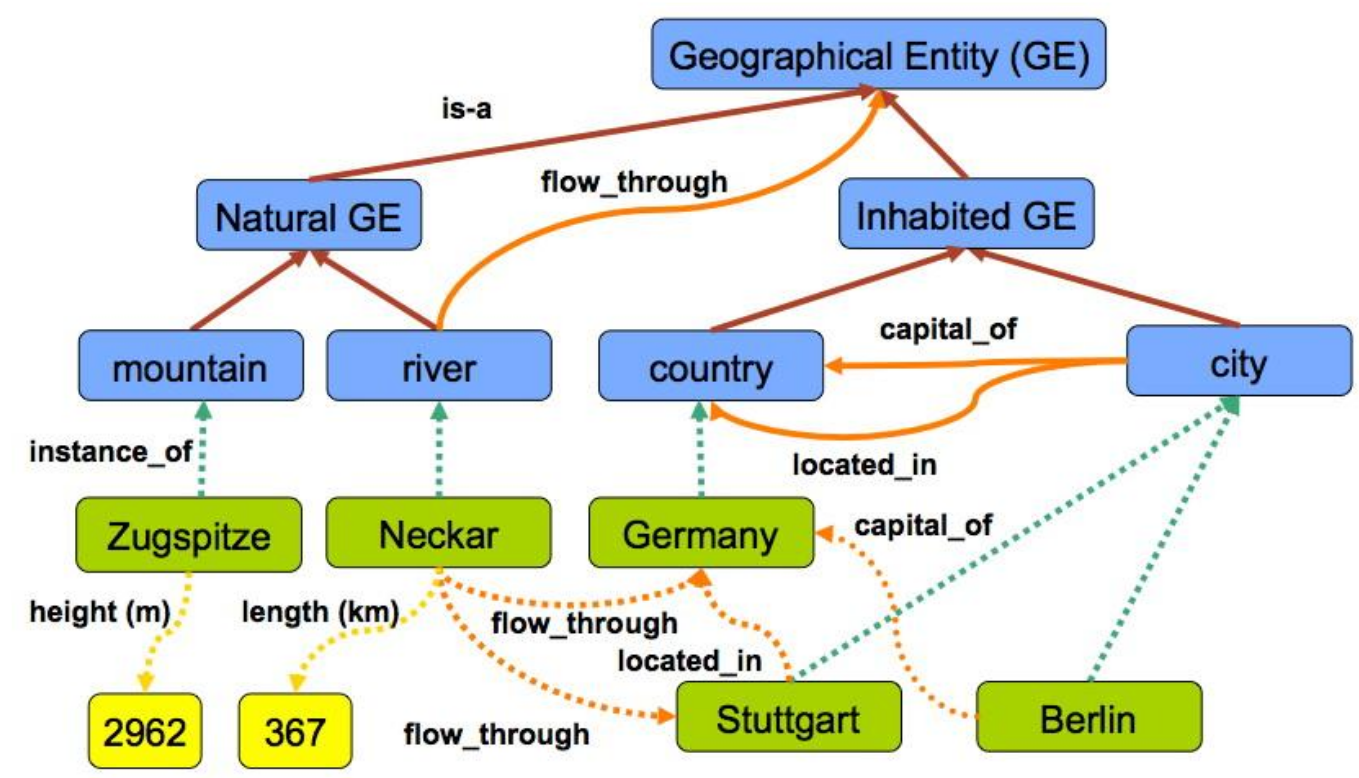

Ziel der ganzen NLP-Pipeline: aus unstrukturierten Daten strukturierte Daten zu bekommen
Wir wollen Wissen aufbauen oder anders gesagt eine Knowledge Base
